In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os

### Tamanho das novas imagens: 256 x 256

In [2]:
img_width = img_height = 256

### Os nossos inputs sao imagens 1500 x 1500. Pre processaremos elas em 36 imagens 256x256 para otimizarmos o treinamento do nosso modelo

In [80]:
def crop_and_save():
    
    ##Para os mapas
    directory = os.fsencode("./maps")
    
    for file in os.listdir(directory):
        counter = 0
        filename = os.fsdecode(file)
        filename_path = directory.decode("utf-8") + "/" + filename
        if filename.endswith(".tiff"):
            img = imageio.imread(filename_path)
            for r in range(0, img.shape[0], img_height):
                for c in range(0, img.shape[1], img_width):
                    counter += 1
                    blank_image = np.zeros((img_height ,img_width, 3), dtype = int)
                    new_image_path = "./new_maps/" + "{:02d}".format(counter) + '_' + filename 
                    new_image = np.array(img[r:r+img_height, c:c+img_width,:])
                    blank_image[:new_image.shape[0], :new_image.shape[1], :] += new_image
                    imageio.imwrite(new_image_path, blank_image)

    ##Para as mascaras
    directory = os.fsencode("./masks")
                    
    for file in os.listdir(directory):
        counter = 0
        filename = os.fsdecode(file)
        filename_path = directory.decode("utf-8") + "/" + filename
        if filename.endswith(".tif"):
            mask = imageio.imread(filename_path)
            for r in range(0, mask.shape[0], img_height):
                for c in range(0, mask.shape[1], img_width):
                    counter += 1
                    blank_mask = np.zeros((img_height ,img_width), dtype = int)
                    new_mask_path = "./new_masks/" + "{:02d}".format(counter) + '_' + filename
                    new_mask = np.array(mask[r:r+img_height, c:c+img_width])        
                    blank_mask[:new_mask.shape[0], :new_mask.shape[1]] += new_mask             
                    imageio.imwrite(new_mask_path, blank_mask)
        else:
            continue

In [81]:
crop_and_save()

### Verificacao do pre processamento das imagens

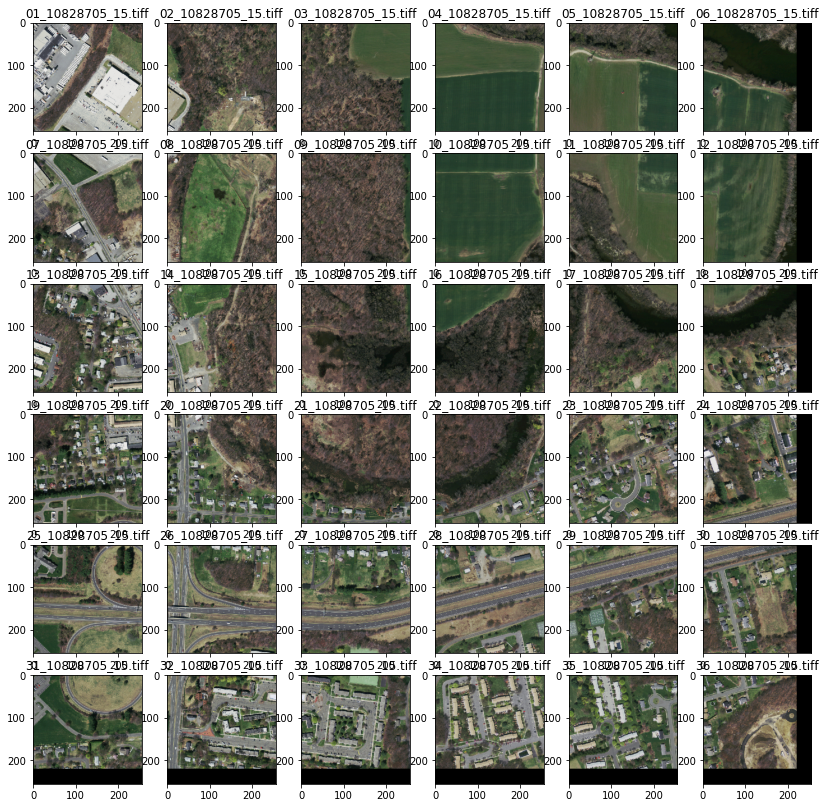

In [82]:
directory = os.fsencode("./new_maps")

images = []
titulos = []

list_directory = os.listdir(directory.decode("utf-8"))

list_directory.sort()
    
for file in list_directory:
    filename = os.fsdecode(file)
    titulos.append(filename)
    filename_path = directory.decode("utf-8") + "/" + filename
    img = imageio.imread(filename_path)
    images.append(img)
    
plt.figure(figsize=(14,14))
for i in range(0,36):
    plt.subplot(6,6,i+1)
    plt.title(titulos[i])
    plt.imshow(images[i])

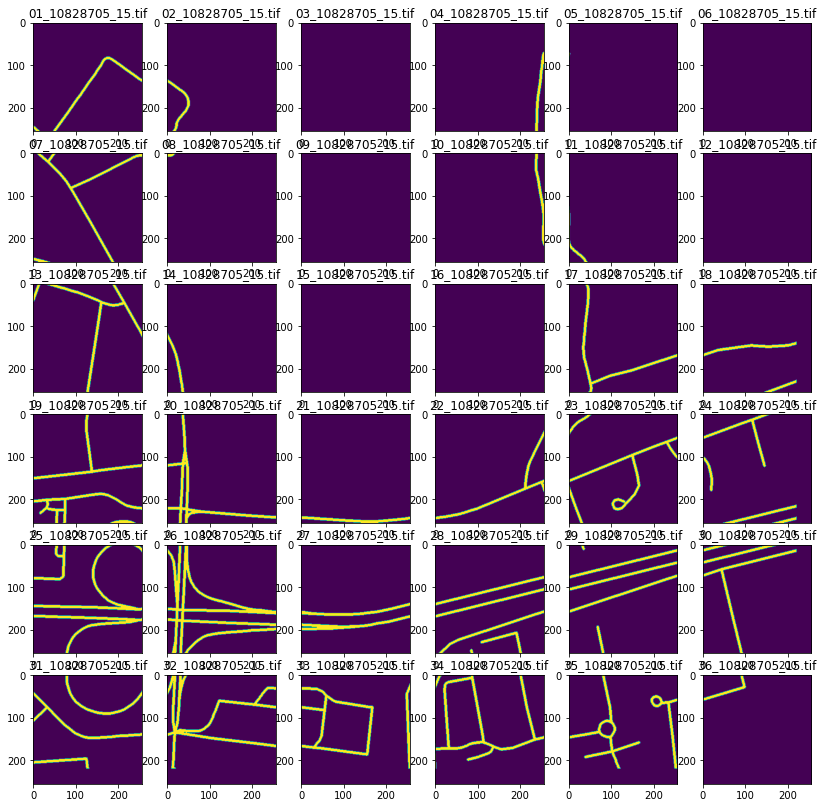

In [85]:
directory = os.fsencode("./new_masks")

masks = []
titulos = []

list_directory = os.listdir(directory.decode("utf-8"))

list_directory.sort()
    
for file in list_directory:
    filename = os.fsdecode(file)
    titulos.append(filename)
    filename_path = directory.decode("utf-8") + "/" + filename
    img = imageio.imread(filename_path)
    masks.append(img)
    
plt.figure(figsize=(14,14))
for i in range(0,36):
    plt.subplot(6,6,i+1)
    plt.title(titulos[i])
    plt.imshow(masks[i])

### Esboco do dataset (pre processado) utilizado para treinar o modelo (18 amostras de Input / Output)

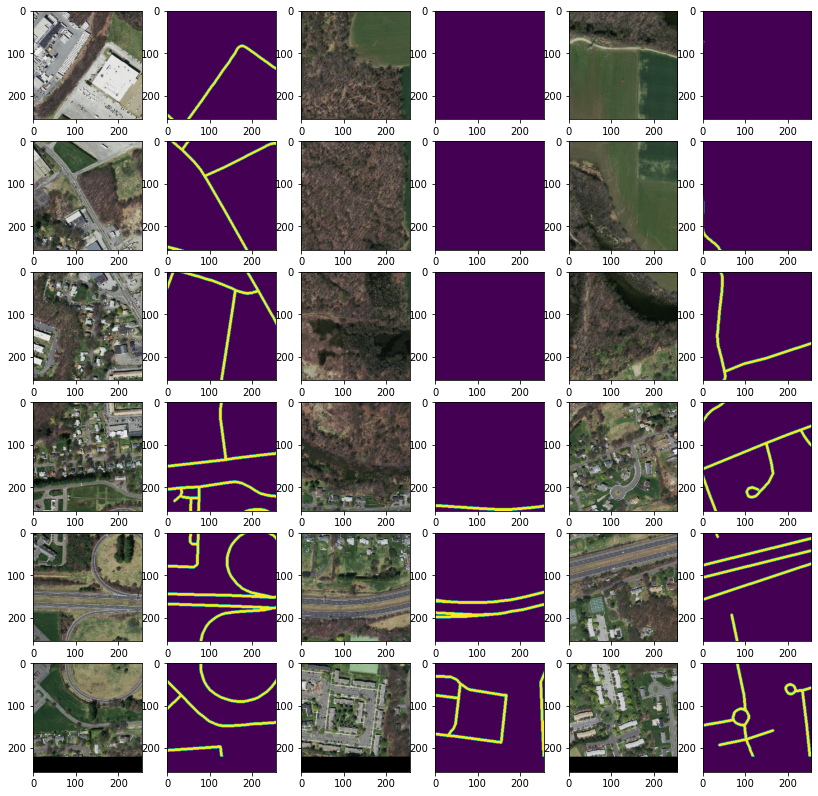

In [90]:
plt.figure(figsize=(14,14))
for i in range(0,36,2):
    plt.subplot(6,6,i+1)
    plt.imshow(images[i])
    plt.subplot(6,6,i+2)
    plt.imshow(masks[i])